<a href="https://colab.research.google.com/github/Tounsix/NLP_Assignment_3/blob/main/Topic_modeling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.



🔹 NMF Topics:
Topic 1: people think say god time like way things good really
Topic 2: drive disk scsi drives hard floppy cable problem power boot
Topic 3: geb pitt njxp dsl chastity skepticism intellect cadre shameful surrender
Topic 4: game team year games season players play hockey win good
Topic 5: car cars miles like driving good bike engine speed dealer
Topic 6: use monitor apple port problem serial vga mac software modem
Topic 7: space nasa data launch shuttle sci lunar program orbit moon
Topic 8: bus controller card scsi ide dma isa motherboard mhz bit
Topic 9: thanks know mail advance info looking edu interested right hi
Topic 10: simms mb vram ns memory simm quadra ram pin need

🔹 LDA Topics:
Topic 1: vs detroit like power helmet game toronto way time leafs
Topic 2: drive disk drives controller hard mb scsi bios card rom
Topic 3: like know monitor card problem thanks time vga use need
Topic 4: car bike time like cars way know engine miles good
Topic 5: think time know second 

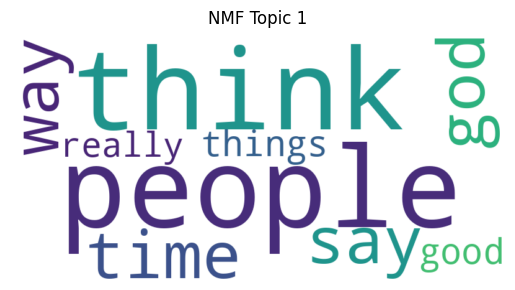

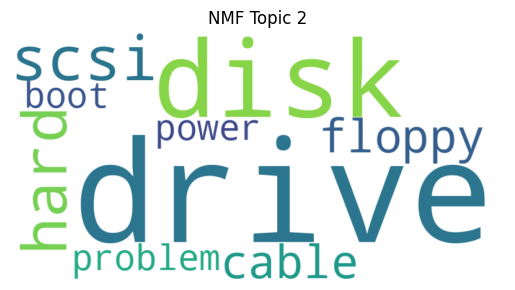

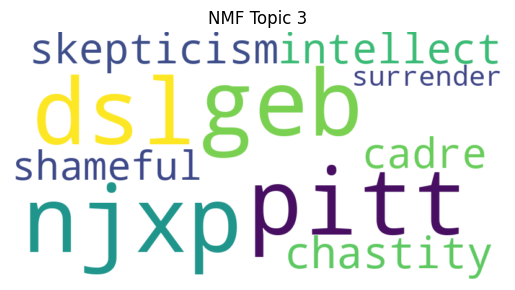

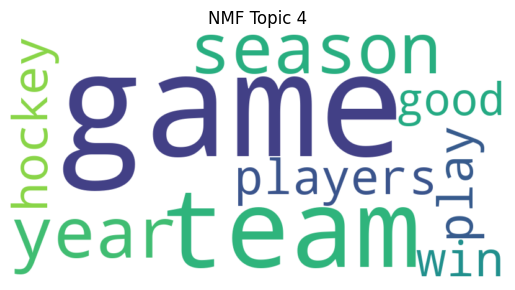

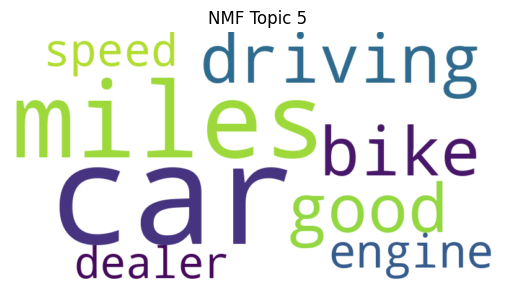

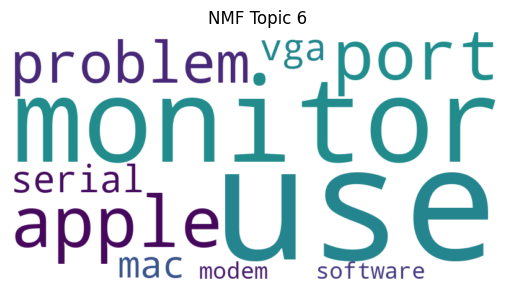

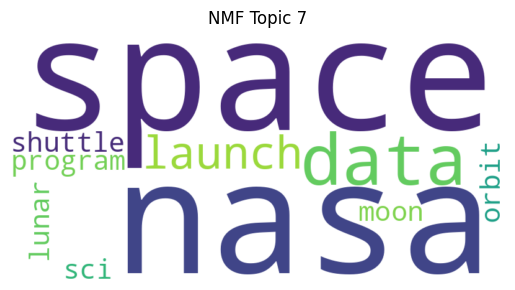

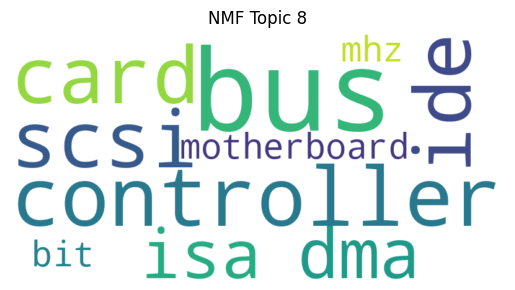

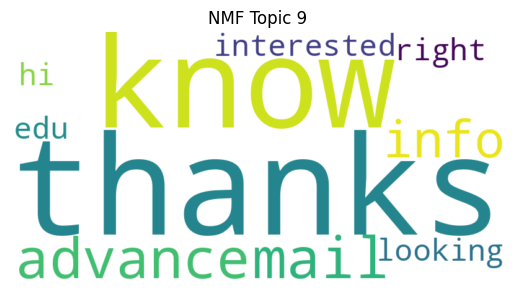

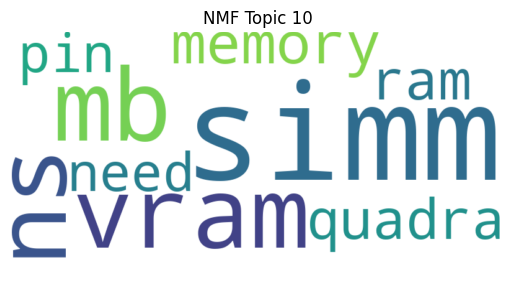

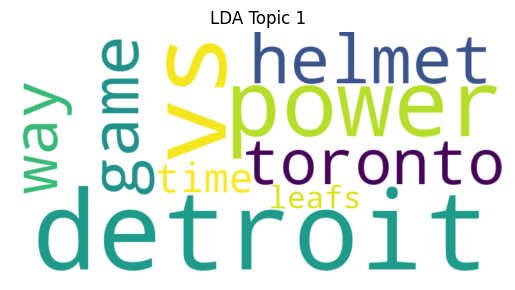

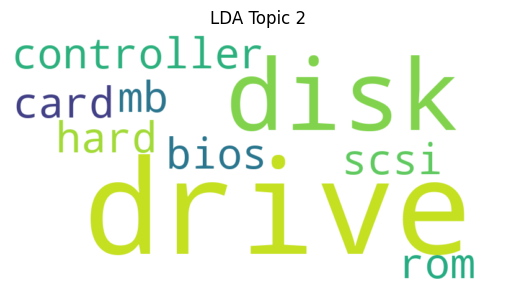

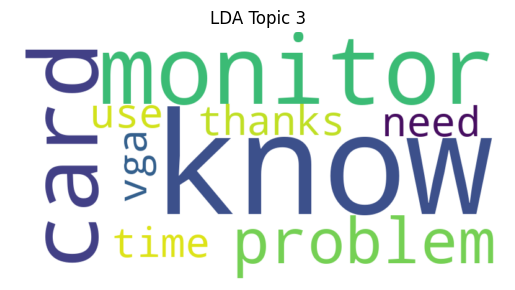

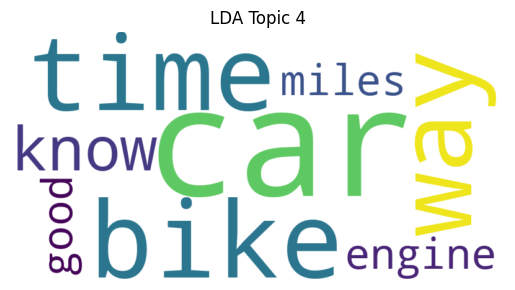

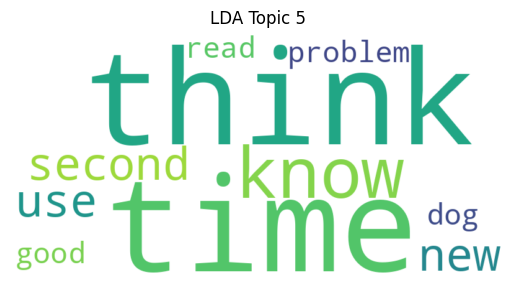

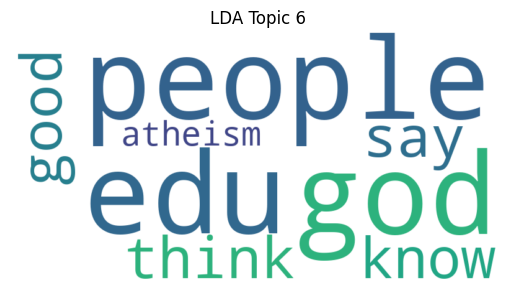

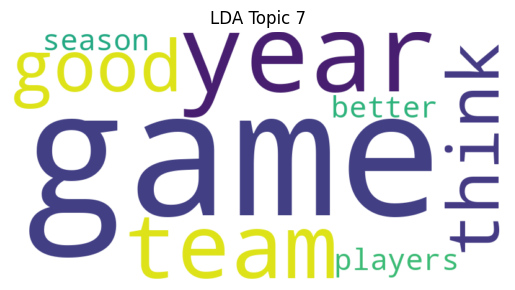

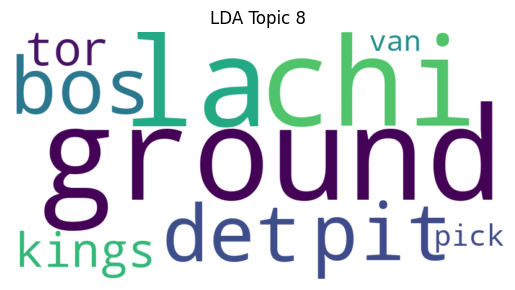

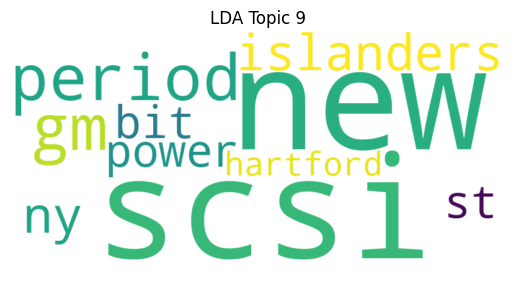

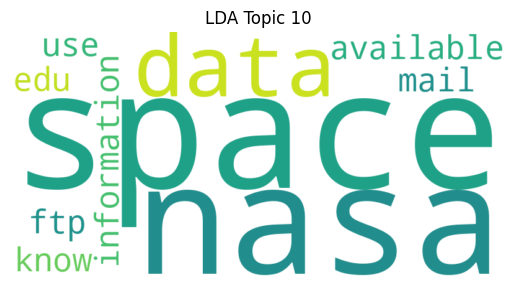

In [4]:
# Step 1: Load the data
import pickle

with open('newsgroups', 'rb') as f:
    newsgroup_data = pickle.load(f)

# Step 2: Clean and preprocess the text
import re
import nltk
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

nltk.download('stopwords')
from nltk.corpus import stopwords

def preprocess(text):
    text = text.lower()
    text = re.sub(r'\d+', '', text)  # remove digits
    text = re.sub(r'\W+', ' ', text)  # remove punctuation
    tokens = text.split()
    tokens = [word for word in tokens if word not in stopwords.words('english')]
    return ' '.join(tokens)

cleaned_data = [preprocess(doc) for doc in newsgroup_data]

# Step 3: Vectorization
tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=2, stop_words='english')
tfidf = tfidf_vectorizer.fit_transform(cleaned_data)

count_vectorizer = CountVectorizer(max_df=0.95, min_df=2, stop_words='english')
count = count_vectorizer.fit_transform(cleaned_data)

# Step 4: Apply NMF
from sklearn.decomposition import NMF

nmf_model = NMF(n_components=10, random_state=42)
nmf_topics = nmf_model.fit_transform(tfidf)

# Step 5: Apply LDA
from sklearn.decomposition import LatentDirichletAllocation

lda_model = LatentDirichletAllocation(n_components=10, random_state=42)
lda_topics = lda_model.fit_transform(count)

# Step 6: Display topics
def display_topics(model, feature_names, no_top_words):
    topic_words = []
    for topic_idx, topic in enumerate(model.components_):
        top_words = [feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]
        topic_words.append(top_words)
        print(f"Topic {topic_idx+1}: {' '.join(top_words)}")
    return topic_words

print("\n🔹 NMF Topics:")
nmf_top_words = display_topics(nmf_model, tfidf_vectorizer.get_feature_names_out(), 10)

print("\n🔹 LDA Topics:")
lda_top_words = display_topics(lda_model, count_vectorizer.get_feature_names_out(), 10)

# Step 7: WordCloud for each method
import matplotlib.pyplot as plt
from wordcloud import WordCloud

def plot_wordclouds(topic_words, method_name):
    for i, words in enumerate(topic_words):
        plt.figure()
        wc = WordCloud(background_color='white', width=800, height=400)
        wc.generate(' '.join(words))
        plt.imshow(wc, interpolation='bilinear')
        plt.axis('off')
        plt.title(f"{method_name} Topic {i+1}")
        plt.show()

plot_wordclouds(nmf_top_words, "NMF")
plot_wordclouds(lda_top_words, "LDA")